In [4]:
println("PART 1: SINGLE DIE");

PART 1: SINGLE DIE


In [5]:
nthrows = 10^6;
@time x = rand(1:6,nthrows);

  0.022976 seconds (749 allocations: 7.673 MiB)


In [6]:
count = 0;
for value in x
    if value == 1;
        count += 1;
    end
end
println("I got ",count," 1's in ",nthrows," tries");

I got 167308 1's in 1000000 tries


In [7]:
function throwto(n)
    count = 1;
    while rand(1:6) != n
        count += 1;
    end
    return count
end

throwto (generic function with 1 method)

In [14]:
results = [throwto(1) for i in 1:nthrows];
max = maximum(results);

In [15]:
function distribute(results)
    dist = zeros(Int64,maximum(results));
    for i in results
        dist[i] += 1;
    end
    return dist
end

distribute (generic function with 1 method)

In [32]:
function numlist(list)
    for (i,x) in enumerate(list)
        println(i," ",x)
    end
end

numlist (generic function with 1 method)

In [33]:
dist = distribute(results);
numlist(dist);

1 166926
2 139216
3 115326
4 96291
5 79846
6 67017
7 56330
8 46821
9 38920
10 32174
11 27347
12 22416
13 18590
14 15662
15 12683
16 10632
17 8916
18 7461
19 6282
20 5286
21 4243
22 3606
23 2939
24 2480
25 1992
26 1720
27 1448
28 1242
29 1028
30 860
31 704
32 582
33 525
34 362
35 317
36 303
37 241
38 227
39 169
40 141
41 120
42 109
43 71
44 72
45 51
46 60
47 43
48 40
49 25
50 25
51 26
52 12
53 14
54 11
55 7
56 7
57 8
58 6
59 2
60 1
61 4
62 2
63 0
64 3
65 2
66 1
67 1
68 3
69 0
70 1
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 1
79 1


In [34]:
average = floor(Int,mean(results));
mostlikely = floor(Int,median(results));
println("average number of steps to roll 1: ",average);
println("most likely number of steps to roll 1: ",mostlikely);

average number of steps to roll 1: 5
most likely number of steps to roll 1: 4


In [35]:
prob = dist/nthrows;

In [36]:
numlist(prob);

1 0.166926
2 0.139216
3 0.115326
4 0.096291
5 0.079846
6 0.067017
7 0.05633
8 0.046821
9 0.03892
10 0.032174
11 0.027347
12 0.022416
13 0.01859
14 0.015662
15 0.012683
16 0.010632
17 0.008916
18 0.007461
19 0.006282
20 0.005286
21 0.004243
22 0.003606
23 0.002939
24 0.00248
25 0.001992
26 0.00172
27 0.001448
28 0.001242
29 0.001028
30 0.00086
31 0.000704
32 0.000582
33 0.000525
34 0.000362
35 0.000317
36 0.000303
37 0.000241
38 0.000227
39 0.000169
40 0.000141
41 0.00012
42 0.000109
43 7.1e-5
44 7.2e-5
45 5.1e-5
46 6.0e-5
47 4.3e-5
48 4.0e-5
49 2.5e-5
50 2.5e-5
51 2.6e-5
52 1.2e-5
53 1.4e-5
54 1.1e-5
55 7.0e-6
56 7.0e-6
57 8.0e-6
58 6.0e-6
59 2.0e-6
60 1.0e-6
61 4.0e-6
62 2.0e-6
63 0.0
64 3.0e-6
65 2.0e-6
66 1.0e-6
67 1.0e-6
68 3.0e-6
69 0.0
70 1.0e-6
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 1.0e-6
79 1.0e-6


In [37]:
using Plots
pyplot()

Plots.PyPlotBackend()


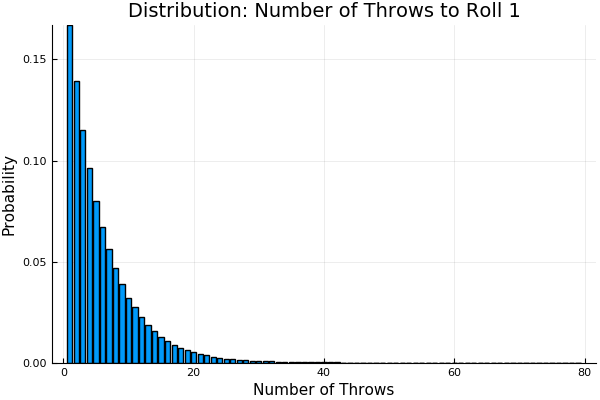

In [38]:
bar(1:max,prob,label="",xlabel="Number of Throws",ylabel="Probability",title="Distribution: Number of Throws to Roll 1")

In [39]:
println("PART 2: TENZY");

PART 2: TENZY


In [40]:
dice = 10;

In [41]:
function mode(nums)
    dnums = zeros(6,1);
    for value in nums
        dnums[value] += 1;
    end
    dmax = maximum(dnums);
    L = minimum(find(dnums->dnums==dmax,dnums));
    numdice = dmax;
    return L, numdice
end

mode (generic function with 1 method)

In [42]:
function rolldice(numdice)
    dice = rand(1:6,numdice);
    return dice
end

rolldice (generic function with 1 method)

In [78]:
function tenzy()
    dice = 10;
    game = rolldice(dice);
    throws = 1;
    L = mode(game)[1];
    numL = mode(game)[2];
    dice = Int(dice - numL);
    while dice > 0
        game = rolldice(dice);
        throws += 1;
        for dval in game
            if dval == L
                dice -= 1;
            end
        end
    end
    return throws
end

tenzy (generic function with 1 method)

In [79]:
tenzy()

18

In [87]:
function play(runs)
    throws = ones(Int64,runs);
    for i in eachindex(throws)
        throws[i] = tenzy();
    end
    dist = distribute(throws);
    return dist
end

play (generic function with 1 method)

In [88]:
gamedist = play(100);
numlist(gamedist);

1 0
2 0
3 0
4 1
5 1
6 3
7 3
8 4
9 4
10 9
11 4
12 14
13 12
14 10
15 6
16 2
17 3
18 3
19 2
20 0
21 2
22 3
23 4
24 0
25 3
26 1
27 0
28 0
29 1
30 0
31 1
32 1
33 0
34 0
35 0
36 0
37 1
38 0
39 0
40 0
41 0
42 0
43 1
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 1


In [82]:
#=
function rungames(runs)
    throws = ones(Int64,runs)
    for i in eachindex(throws)
        dice = 10;
        game = rolldice(dice);
        throws[i] = 1;
        L = mode(game)[1];
        numL = mode(game)[2];
        dice = Int(dice - numL);
        while dice > 0
            game = rolldice(dice);
            throws[i] += 1;
            for dval in game
                if dval == L
                   dice -= 1;
                end
            end
        end
    end
    return throws
end
=#

In [83]:
#=
play100 = rungames(100);
play1000 = rungames(1000);
play10000 = rungames(10000);
=#

In [84]:
#=
prob100 = play100/100;
prob1000 = play1000/1000;
prob10000 = play10000/10000;
=#

In [85]:
#=
max100 = maximum(play100);
max1000 = maximum(play1000);
max10000 = maximum(play10000);
=#

In [89]:
dist100 = play(100);
dist1000 = play(1000);
dist10000 = play(10000);

In [90]:
prob100 = dist100 / 100;
prob1000 = dist1000 / 1000;
prob10000 = dist10000 / 10000;


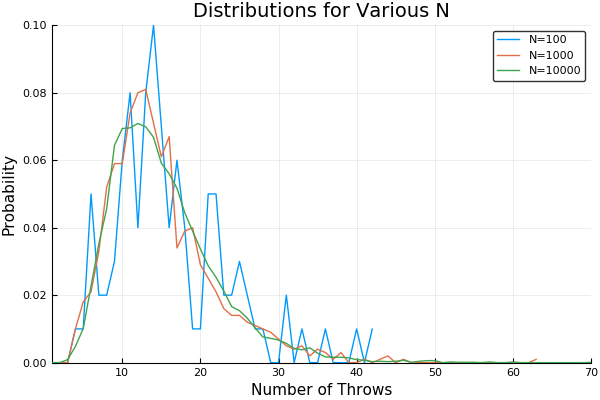

In [91]:
plot(prob100,label="N=100",xlabel="Number of Throws",ylabel="Probability",title="Distributions for Various N")
plot!(prob1000,label="N=1000")
plot!(prob10000,label="N=10000")


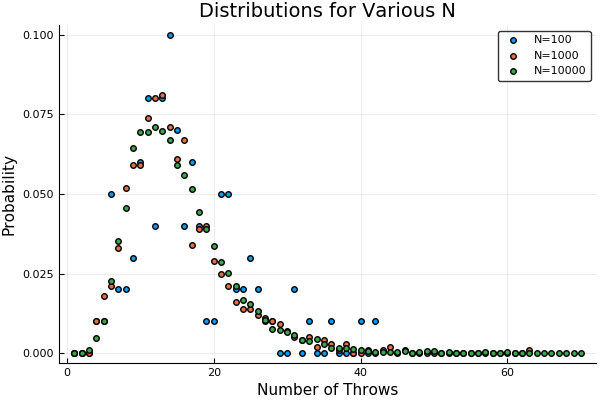

In [92]:
scatter(prob100,label="N=100",xlabel="Number of Throws",ylabel="Probability",title="Distributions for Various N")
scatter!(prob1000,label="N=1000")
scatter!(prob10000,label="N=10000")